In [27]:
# from openpyxl import *

# wb = load_workbook('c:/python/pandas/titanic.xlsx')

# ws = wb.get_sheet_by_name('Sheet1')

# for row in ws :
#     for idx,cell in enumerate(row) :
#         if idx != 0 :
#             print('\t',end='')
#         print(cell.value,end='')
#     print()




In [3]:
import os
import pandas as pd

print(os.getcwd())

# csv 파일 불러오기
titanic = pd.read_csv('titanic.csv')

titanic.head(5) # 위에서 5번째 까지 출력(key값 포함)

# 각 열의 데이터 유형 확인하기
titanic.dtypes

# 엑셀파일로 저장하기
titanic.to_excel('titanic.xlsx',sheet_name='passengers',index=False)

# 엑셀파일 읽기

titanic = pd.read_excel('titanic.xlsx',sheet_name='passengers')

# 파일 정보 요약출력
titanic.info()
print('==================')

# 특정 열 선택하기 (pandas에서 단일열 = series)
ages = titanic['Age']
ages
type(ages)

# 여러 열 출력하기 (여러개의 series = Dataframe)
age_sex = titanic[['Age','Sex']] # 여러 열 선택 시 리스트 형태로
age_sex.head(5)
type(age_sex)

# 특정 행에서 특정 cell 필터링 하기

above_35 = titanic[ages>35]
above_35.head(5)

ages > 35 # --> series 중 조건에 해당되는 지 확인(bool값)

# isin([a,b,c,...]) a,b,c...가 포함된 항목만 필터링

class_23 = titanic[titanic['Pclass'].isin([2,3])]
class_23.head()

# nonta() : N/A 항목 제외

age_no_na = titanic[titanic["Age"].notna()]
age_no_na.head()

# 특정 조건을 만족하는 특정 열(series)만 .loc[조건,colomn명] 
print('ans')
adult_names = titanic.loc[titanic["Age"]>35,"Name"]
print(adult_names)

# 특정 행,열 영역만 추출 => .iloc[행,열]

titanic.iloc[9:25,1:5]

# 특정 행, 열의 값 할당

titanic.iloc[0:3,3] = 'anonymous'
titanic.iloc[0:3,0:10]

c:\python\pandas
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB
ans
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
6                                McCarthy, Mr. Timothy J
11                              Bonnell, Miss. Elizabeth
13                           Andersson, Mr. Anders J

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
0,1,0,3,anonymous,male,22.0,1,0,A/5 21171,7.2500
1,2,1,1,anonymous,female,38.0,1,0,PC 17599,71.2833
2,3,1,3,anonymous,female,26.0,0,0,STON/O2. 3101282,7.9250


<AxesSubplot:>

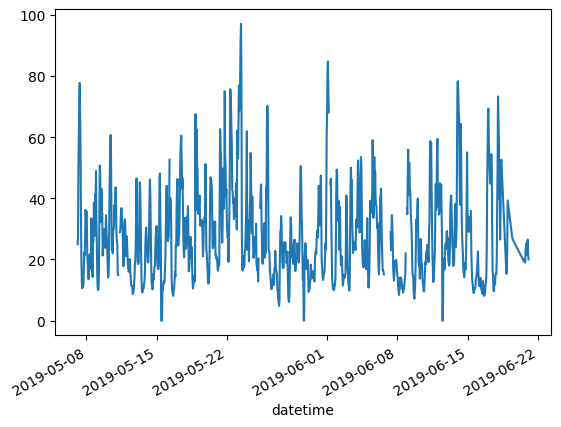

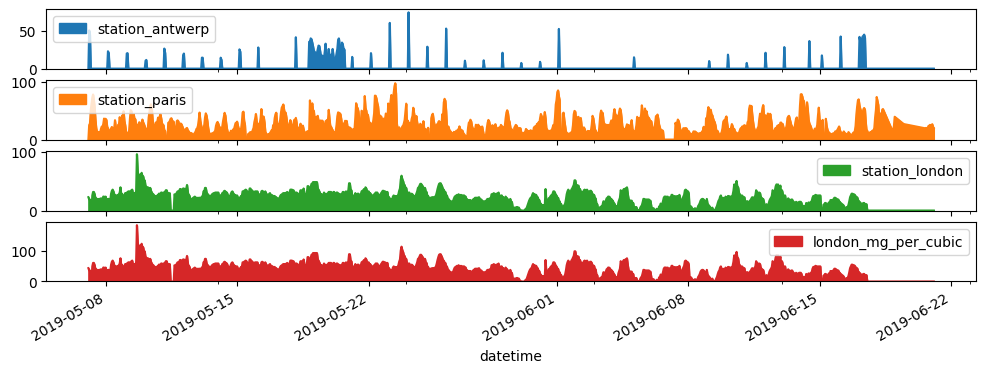

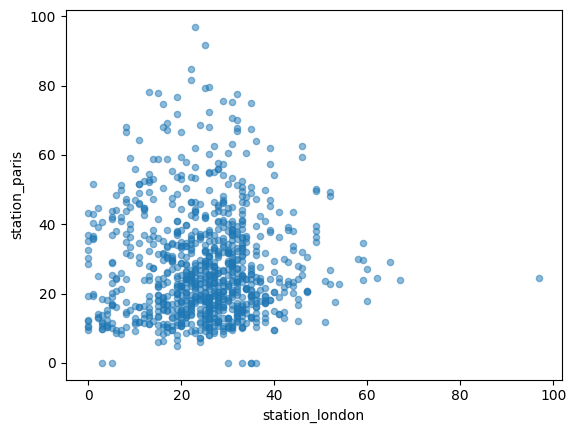

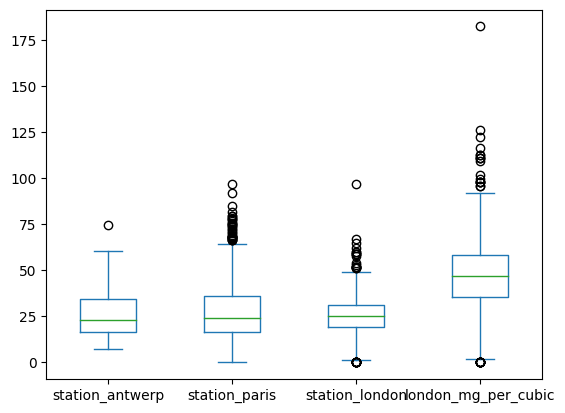

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import os
os.chdir('c:/python/pandas')

#시각화

air = pd.read_csv('air.csv', index_col=0, parse_dates=True)
# index_col=0 => 첫번째 행(순번)을 생략하고 나타냄(index컬럼을 생략), parse_date=True => 특정 칼럼을 시간으로 인식하도록 함.
air.head()

plt.style.use('default')
# 기본 plot
# air.plot()

# 특정열 plot
air['station_paris'].plot()

# 각 colomn별 plot을 별도로 표기
axs = air.plot.area(figsize=(12,4), subplots=True)

# 산점도
air.plot.scatter(x='station_london',y='station_paris',alpha=0.5)

# box plot
air.plot.box()






In [50]:
import pandas as pd

# 새로운 column 추가

# 1.런던 질소 농도 추가
air['london_mg_per_cubic'] = air['station_london']*1.882

# 2. 런던-파리 비교 셀 추가
air['ratio_london_paris'] = air['station_london']/air['station_paris']
air

# 칼럼명 변경

air_rename = air.rename(columns={'station_antwerp':'BETR801','station_paris':'FR0414','station_london':'London Westminster'})

air_rename

,BETR801,FR0414,London Westminster,london_mg_per_cubic,ration_london_paris,ratio_london_paris
datetime,,,,,,
2019-05-07 02:00:00,NaN,NaN,23.0,43.286,NaN,NaN
2019-05-07 03:00:00,50.5,25.0,19.0,35.758,0.760000,0.760000
2019-05-07 04:00:00,45.0,27.7,19.0,35.758,0.685921,0.685921
2019-05-07 05:00:00,NaN,50.4,16.0,30.112,0.317460,0.317460
2019-05-07 06:00:00,NaN,61.9,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2019-06-20 22:00:00,NaN,21.4,NaN,NaN,NaN,NaN
2019-06-20 23:00:00,NaN,24.9,NaN,NaN,NaN,NaN
2019-06-21 00:00:00,NaN,26.5,NaN,NaN,NaN,NaN


In [4]:
import pandas as pd
import os
os.chdir('c:/python/pandas')

#통계 계산
titanic = pd.read_csv('titanic.csv',index_col=0, parse_dates= True)
titanic
#1 평균 계산
titanic['Age'].mean()

#2 중위수
titanic[['Age','Fare']].median()

# 종합
titanic[['Age','Fare']].describe()

a = titanic.agg( {'Age':['min','max','median','skew'],'Fare':['min','max','median','mean']} )
print(a)
#그룹화

# 여성과 남성의 평균나이
titanic[['Sex','Age']].groupby('Sex').mean()

# sex로 그룹화 한 후 평균 구하기
titanic.groupby('Sex').mean()

# 그룹화
titanic.groupby(['Sex','Pclass'])['Fare'].mean()

# 범주별 레코드 수

titanic['Pclass'].value_counts()

# 정렬하기

# 1. 승객의 나이에 따라 타이타닉 데이터 정렬하기

titanic.sort_values(by='Age')

# 2. 기내 클래스의 나이에 따라 타이타닉 데이터 내림차순 정렬하기 (ascending = True : 오름차순 / False : 내림차순)
titanic.sort_values(by=['Pclass','Age'], ascending=False)

# 텍스트 수정하기

# 대문자를 소문자로 변경하기
titanic['Name'].str.lower()

# 쉼표 앞의 부분을 추출하여 승객의 성을 포함하는 새 열을 생성
titanic['Surname'] = titanic['Name'].str.split(',').str.get(0)

# 승객이름 중 Countess가 들어간 데이터 추출
titanic[titanic['Name'].str.contains('Countess')]



              Age        Fare
min      0.420000    0.000000
max     80.000000  512.329200
median  28.000000   14.454200
skew     0.389108         NaN
mean          NaN   32.204208


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname
PassengerId,,,,,,,,,,,,
760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.5,B77,S,Rothes


In [3]:
import pandas as pd

air_quality_pm25 = pd.read_csv('c:/python/pandas/air_quality_pm25.csv')
air_quality_no2 = pd.read_csv('c:/python/pandas/air_quality_no2.csv')
air_quality = pd.read_csv('air_quality.csv', parse_dates= True)

# 3. NO2 DATA만 뽑아내기

no2 = air_quality[air_quality['parameter']=='no2']

# .sort_index() : index기준으로 정렬하기

# location기준으로 2개씩 그룹지어서 index기준으로 정렬

no2_subset = no2.sort_index().groupby(['location']).head(2)

no2_subset

# 피벗활용

# location별 no2 value값만 추출
no2.pivot(columns='location',values='value')

# 각 스테이션에 대한 평균농도 피벗테이블 (요약 추가 => margins=True)

air_quality.pivot_table(values='value',index='location',columns='parameter',aggfunc='mean',margins=True)


# .reset_index() => 추출된 값의 기존 index를 리셋하고 0부터 시작
no2_pivoted = no2.pivot(columns="location", values="value",index='date.utc').reset_index()

# .metl() 테이블 구성

no2_pivoted

no_2 = no2_pivoted.melt(id_vars='date.utc',value_vars=['BETR801','FR04014','London Westminster'],value_name='no2',var_name='location')

no_2.head()

# 데이터 결합

#concat
# axis = 0 : 0축(첫 행)을 따라 두 데이터 테이블을 결합
# axis = 1 : 1축(첫 열)을 기준으로 테이블을 결합(컬럼이 중복되면 덮어쓰기 됨)
air_quality = pd.concat([air_quality_pm25,air_quality_no2], axis=0)

# 날짜 기준으로 테이블 정렬
air_quality.sort_values('date.utc')

,"city,country,date.utc,location,parameter,value,unit",Unnamed: 1,Unnamed: 2,city,country,date.utc,location,parameter,value,unit
2067,NaN,NaN,NaN,London,GB,2019-05-07 01:00:00+00:00,London Westminster,no2,23.0,µg/m³
1098,NaN,NaN,NaN,Antwerpen,BE,2019-05-07 01:00:00+00:00,BETR801,no2,50.5,µg/m³
1003,NaN,NaN,NaN,Paris,FR,2019-05-07 01:00:00+00:00,FR04014,no2,25.0,µg/m³
1002,NaN,NaN,NaN,Paris,FR,2019-05-07 02:00:00+00:00,FR04014,no2,27.7,µg/m³
2066,NaN,NaN,NaN,London,GB,2019-05-07 02:00:00+00:00,London Westminster,no2,19.0,µg/m³
...,...,...,...,...,...,...,...,...,...,...
1105,"London,GB,2019-05-07","06:00:00+00:00,London","Westminster,pm25,9.0,µg/m³",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1106,"London,GB,2019-05-07","04:00:00+00:00,London","Westminster,pm25,8.0,µg/m³",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1107,"London,GB,2019-05-07","03:00:00+00:00,London","Westminster,pm25,8.0,µg/m³",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1108,"London,GB,2019-05-07","02:00:00+00:00,London","Westminster,pm25,8.0,µg/m³",NaN,NaN,NaN,NaN,NaN,NaN,NaN
